In [42]:
# 2020 May 30 - Fitting a height-diameter scaling to the data from Lorenz (2013)
# https://ui.adsabs.harvard.edu/abs/2013Icar..226..964L/abstract

%matplotlib inline

import numpy as np
from numpy.random import uniform
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'
aspect_ratio = 16./9

In [72]:
# Table 1 - numbers from Flower (1936)
min_diameters = np.array([0., 5., 10., 20., 40., 80., 150.])*0.3048 # feet to meters
max_diameters = np.array([5., 10., 20., 40., 80., 150., 300.])*0.3048 # feet to meters
mean_diameters = 0.5*(max_diameters + min_diameters)

min_heights = np.array([0., 5., 10., 20., 40., 80., 150., 300., 500., 1000., 2000., 3000.])*0.3048
max_heights = np.array([5., 10., 20., 40., 80., 150., 300., 500., 1000., 2000., 3000., 4000.])*0.3048
mean_heights = 0.5*(max_diameters + min_diameters)

counts = np.array([[11, 6, 4, 1, 0, 2, 2, 0, 0, 0, 0, 0], 
                   [3, 10, 4, 3, 3, 7, 2, 1, 4, 0, 0, 0], 
                   [2, 3, 3, 3, 10, 8, 5, 5, 4, 3, 0, 0], 
                   [0, 0, 5, 4, 8, 9, 5, 3, 6, 3, 0, 0], 
                   [0, 0, 0, 1, 3, 6, 12, 4, 2, 7, 1, 0], 
                   [0, 0, 0, 1, 1, 2, 2, 6, 7, 2, 1, 1], 
                   [0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0]])

In [44]:
def linfit(x, m, b):
    return m*x + b

[0.67148208 0.64160516]
[0.0857765  0.07215095]
1.9991732101164257


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


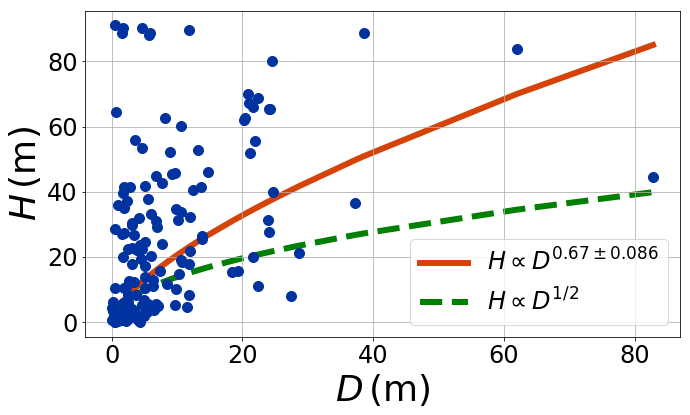

In [77]:
diameters = np.array([])
heights = np.array([])

for i in range(len(mean_diameters)):
    for j in range(len(mean_heights)):
#         diameters = np.append(diameters, np.ones(counts[i,j])*mean_diameters[i])
#         heights = np.append(heights, np.ones(counts[i,j])*mean_heights[j])

        for k in range(counts[i,j]):
            diameters = np.append(diameters, uniform(min_diameters[i], max_diameters[i]))
            heights = np.append(heights, uniform(min_heights[j], max_heights[j]))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(diameters, heights, marker='.', color=BoiseState_blue, ls='', markersize=20)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
popt, pcov = curve_fit(linfit, np.log10(diameters), np.log10(heights))
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)
print((popt[0] - 0.5)/errs[0])

x = np.sort(diameters)
ax.plot(x, 10**(popt[1])*x**popt[0], color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H \\propto D^{%.2g\\pm%.2g}$" % (popt[0], errs[0]))
ax.plot(x, 10**(popt[1])*x**0.5, color='green', ls='--', lw=6, zorder=-1, 
        label="$H \\propto D^{1/2}$")

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)
ax.legend(loc='best', fontsize=24)

fig.savefig("Synthetic_Data_from_Flowers.png", dpi=500, bbox_inches="tight")

[0.77246717 0.57879244]
[0.08344841 0.06881602]
3.2650970510235173


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


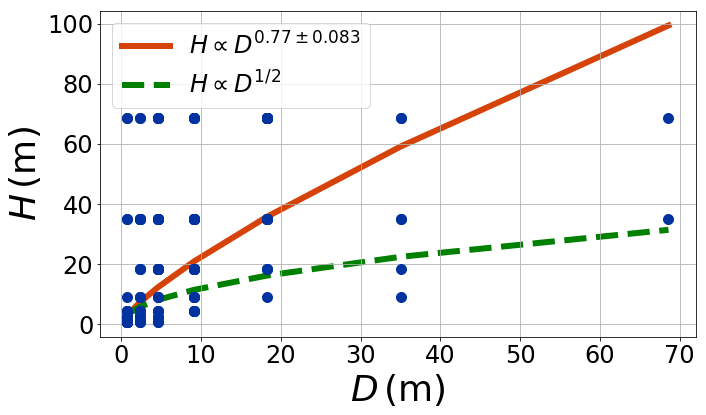

In [78]:
diameters = np.array([])
heights = np.array([])

for i in range(len(mean_diameters)):
    for j in range(len(mean_heights)):
        diameters = np.append(diameters, np.ones(counts[i,j])*mean_diameters[i])
        heights = np.append(heights, np.ones(counts[i,j])*mean_heights[j])

#         for k in range(counts[i,j]):
#             diameters = np.append(diameters, uniform(min_diameters[i], max_diameters[i]))
#             heights = np.append(heights, uniform(min_heights[j], max_heights[j]))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(diameters, heights, marker='.', color=BoiseState_blue, ls='', markersize=20)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
popt, pcov = curve_fit(linfit, np.log10(diameters), np.log10(heights))
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)
print((popt[0] - 0.5)/errs[0])

x = np.sort(diameters)
ax.plot(x, 10**(popt[1])*x**popt[0], color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H \\propto D^{%.2g\\pm%.2g}$" % (popt[0], errs[0]))
ax.plot(x, 10**(popt[1])*x**0.5, color='green', ls='--', lw=6, zorder=-1, 
        label="$H \\propto D^{1/2}$")

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)
ax.legend(loc='best', fontsize=24)

fig.savefig("Original_Data_from_Flowers.png", dpi=500, bbox_inches="tight")